# Day 3 - Data Science Essentials Program

Agenda:
- Logistic Regressions
- Decision Trees

## Import Packages and Data

In [35]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from scipy.special import expit
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [21]:
#!pip install scipy
#!pip install scikit-learn

In [20]:
df = pd.read_csv("ExData/score.csv")

## Coffee break until 10am

## Overview of Logistic Regression
- open the `LogisticRegression.ipynb` notebook
- Python 2 presentation - slide 63

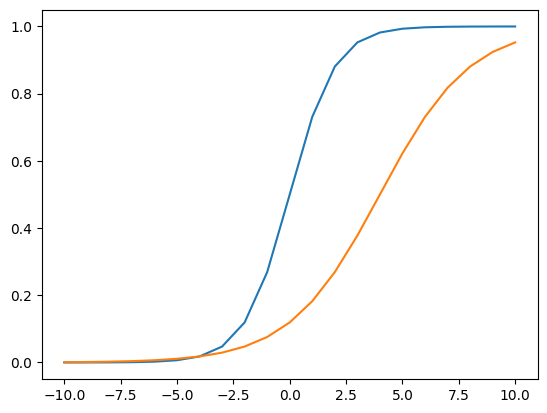

In [34]:
x = np.arange(-10,11,1)
y = 1/(1+np.exp(-x))
# y2 = 1/(1+np.exp(-(0.5*x-2)))
y2 = expit(0.5*x-2)
plt.plot(x, y)
plt.plot(x, y2)

## Student Hours Demo

In [40]:
df['Outcome'] = df['Scores'].apply(lambda x: 1 if x>=50 else 0)
df.head()

,Hours,Scores,Outcome
0,2.5,21,0
1,5.1,47,0
2,3.2,27,0
3,8.5,75,1
4,3.5,30,0


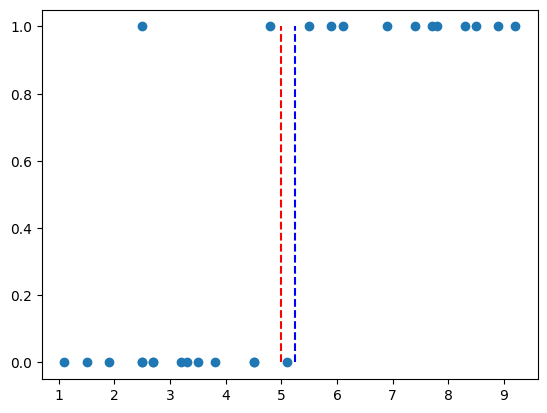

In [43]:
plt.scatter(df['Hours'], df['Outcome'])
plt.vlines(5, ymin=0, ymax=1, color='r', linestyles='--')
plt.vlines(5.25, ymin=0, ymax=1, color='b', linestyles='--')
plt.show()

### Running the Logistic Model
- create your X and y variables
- X has to be a 2-d array or matrix (or a table in pandas)
    - it cannot be one series ("flat array")

In [48]:
#df[['Scores']] #dataframe
#df['Scores'] #series
df['Scores'].shape, df[['Scores']].shape

((27,), (27, 1))

In [51]:
X = df['Hours'].values.reshape(-1,1)#-1 means ?? rows, figure out the optimal # of rows to fit in 1 col
X.shape

(27, 1)

In [52]:
df['Hours'].values.reshape(-1,3) #fits it in 9 rows and 3 columns
    #reconfiguring the matrix

array([[2.5, 5.1, 3.2],
       [8.5, 3.5, 1.5],
       [9.2, 5.5, 8.3],
       [2.7, 7.7, 5.9],
       [4.5, 3.3, 1.1],
       [8.9, 2.5, 1.9],
       [6.1, 7.4, 2.7],
       [4.8, 3.8, 6.9],
       [7.8, 2.5, 4.5]])

In [54]:
X = df[['Hours']]
y = df['Outcome']
clf = LogisticRegression(random_state=0) 
        #for this example random_state not really needed, bc it's a simple solution
            #will quickly find the optimal sigmoid
clf.fit(X, y)

LogisticRegression(random_state=0)

In [55]:
clf.coef_, clf.intercept_  #beta1, beta0

(array([[1.13737908]]), array([-5.50079133]))

In [60]:
x_new = 2
prob = expit(clf.intercept_ + clf.coef_ * x_new)
prob

array([[0.03819772]])

In [63]:
df['Predict'] = clf.predict(X) #anything with a prob > 50% is a pass

In [87]:
clf.predict_proba(X) 
#creates a matrix with 2 cols, first col are probs of fail, 2nd probs of pass
passCol = clf.predict_proba(X)[:,1]
failCol = clf.predict_proba(X)[:,0]
df['Prob Pass'] = passCol
df['Predict 80% Thresh'] = df['Prob Pass'].apply(lambda x: 1 if x>0.8 else 0)
df.head(3)

,Hours,Scores,Outcome,Predict,Prob Pass,Predict 60% Thresh,Predict 80% Thresh
0,2.5,21,0,0,0.065538,0,0
1,5.1,47,0,1,0.574404,1,0
2,3.2,27,0,0,0.134566,0,0


### Visualize Results

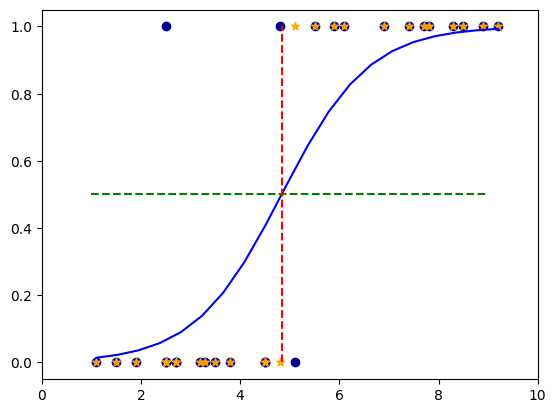

In [77]:
X_axis_values = np.linspace(df['Hours'].min(), df['Hours'].max(), 20)
y_sig = expit(X_axis_values * clf.coef_ + clf.intercept_).ravel()

plt.plot(X_axis_values, y_sig, color='b') #sigmoid function from the model
plt.scatter(df['Hours'], df['Outcome'], color='darkblue', marker='o')
plt.scatter(df['Hours'], df['Predict'], color='orange', marker='*', alpha=0.9)


plt.hlines(0.5, xmin=1, xmax=9, color='g', linestyles='--')

mid_point = (np.log(1/0.5 - 1) - clf.intercept_)/clf.coef_
plt.vlines(mid_point, ymin=0, ymax=1, color='r', linestyles='--')

plt.xlim([0, 10])
plt.show()

## Checking the Performance of the Model
- there are various metrics you can calculate to see how "accurate" the model is
- confusion matrix
- accuracy score
- precision
- recall
- f1 score

In [78]:
clf.score(X, y) #accuracy score
        # (TP + TN) / (total count of all data)
            #TP = true positive
            #TP = true negative

0.8888888888888888

In [81]:
confusion_matrix(df['Outcome'], df['Predict'])
        # 2 false negatives
#confusion_matrix(y, clf.predict(X))
# Accuracy score (13 + 11)/27

array([[13,  1],
       [ 2, 11]], dtype=int64)

In [88]:
confusion_matrix(df['Outcome'], df['Predict 80% Thresh'])

array([[14,  0],
       [ 4,  9]], dtype=int64)

In [82]:
#precision --> looking at accuracy of just the positives
        # "how many of the passes were correct of the pass predictions"
11 / (11+1)

0.9166666666666666

In [83]:
#recall --> of all the positives that exist, how many were found
11 / (11 + 2)

0.8461538461538461

In [85]:
print(classification_report(df['Outcome'], df['Predict']))
    #slide 71 summary of all the calcs

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.92      0.85      0.88        13

    accuracy                           0.89        27
   macro avg       0.89      0.89      0.89        27
weighted avg       0.89      0.89      0.89        27



In [89]:
print(classification_report(df['Outcome'], df['Predict 80% Thresh']))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        14
           1       1.00      0.69      0.82        13

    accuracy                           0.85        27
   macro avg       0.89      0.85      0.85        27
weighted avg       0.88      0.85      0.85        27



## Car Data Set - Logistic Regression

In [213]:
df = pd.read_csv("ExData/car_data.csv", index_col=['User ID'])
# df.describe()

In [214]:
df['Purchased'].value_counts() #countif

Purchased
0    598
1    402
Name: count, dtype: int64

In [215]:
df[['Purchased','Gender']].value_counts()

Purchased  Gender
0          Male      301
           Female    297
1          Female    219
           Male      183
Name: count, dtype: int64

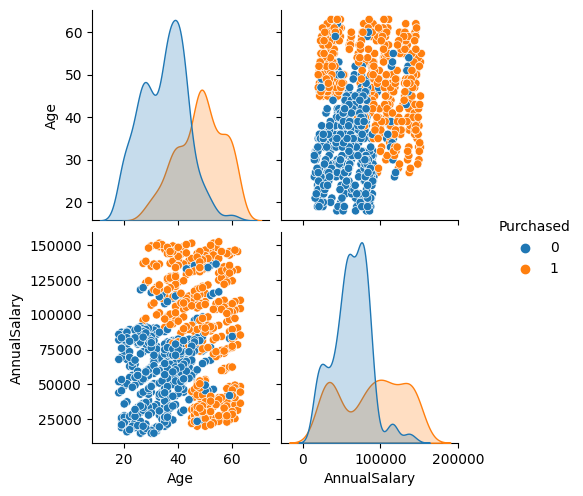

In [218]:
sns.pairplot(df, hue='Purchased')
# sns.pairplot(df, hue='Gender')

<Axes: >

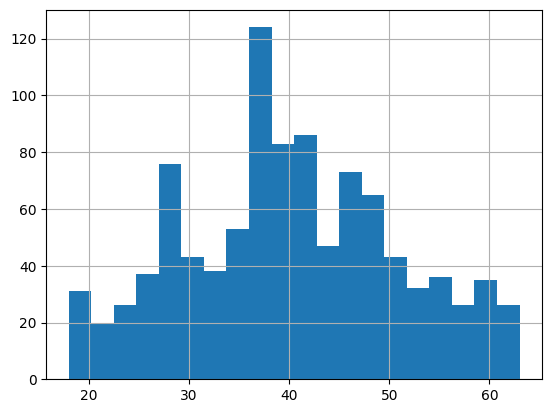

In [101]:
df['Age'].hist(bins=20)

## Logistic Regression - Car Data - No Preprocessing
- will get bad results due to scaling of salary

In [111]:
X = df[['AnnualSalary']]
y = df['Purchased']
clf = LogisticRegression(random_state=0)
clf.fit(X,y)

LogisticRegression(random_state=0)

In [112]:
#Accuracy score = # of correct predictins as % of total obs
clf.score(X,y)

0.598

In [113]:
confusion_matrix(y, clf.predict(X))

array([[598,   0],
       [402,   0]], dtype=int64)

In [114]:
print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       598
           1       0.00      0.00      0.00       402

    accuracy                           0.60      1000
   macro avg       0.30      0.50      0.37      1000
weighted avg       0.36      0.60      0.45      1000



c:\users\v806013\ds\tools\python3.8\latest\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\v806013\ds\tools\python3.8\latest\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\v806013\ds\tools\python3.8\latest\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Processing the Data
- sometimes useful to scale up or down your data if too small or too big
- in our case salaries are too large
- standardscaler --> z-scores
    - (x - avg) / std
- maxabsscaler --> x / max(x's) 

In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
df['AnnualSalaryStd'] = StandardScaler().fit_transform(df[['AnnualSalary']]) #z-scores
df['AnnualSalaryScaled'] = MaxAbsScaler().fit_transform(df[['AnnualSalary']]) #xi / max(all x)

In [118]:
df['Salary k$'] = df['AnnualSalary']/1000

In [183]:
# X = df[['Salary k$']]
X = df[['AnnualSalaryStd']]
y = df['Purchased']
clf = LogisticRegression(random_state=0)
clf.fit(X,y)

LogisticRegression(random_state=0)

In [184]:
clf.score(X,y)

0.771

In [185]:
confusion_matrix(y, clf.predict(X))

array([[566,  32],
       [197, 205]], dtype=int64)

In [186]:
print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83       598
           1       0.86      0.51      0.64       402

    accuracy                           0.77      1000
   macro avg       0.80      0.73      0.74      1000
weighted avg       0.79      0.77      0.76      1000



In [130]:
df

,Gender,Age,AnnualSalary,Purchased,AnnualSalaryStd,AnnualSalaryScaled,Salary k$
User ID,,,,,,,
385,Male,35,20000,0,-1.528498,0.131148,20.0
681,Male,40,43500,0,-0.846767,0.285246,43.5
353,Male,49,74000,0,0.038032,0.485246,74.0
895,Male,40,107500,1,1.009861,0.704918,107.5
661,Male,25,79000,0,0.183081,0.518033,79.0
...,...,...,...,...,...,...,...
863,Male,38,59000,0,-0.397115,0.386885,59.0
800,Female,47,23500,0,-1.426964,0.154098,23.5
407,Female,28,138500,1,1.909165,0.908197,138.5


In [132]:
df = pd.concat([df, pd.get_dummies(df['Gender'])], axis=1)
df

,Gender,Age,AnnualSalary,Purchased,AnnualSalaryStd,AnnualSalaryScaled,Salary k$,Female,Male
User ID,,,,,,,,,
385,Male,35,20000,0,-1.528498,0.131148,20.0,False,True
681,Male,40,43500,0,-0.846767,0.285246,43.5,False,True
353,Male,49,74000,0,0.038032,0.485246,74.0,False,True
895,Male,40,107500,1,1.009861,0.704918,107.5,False,True
661,Male,25,79000,0,0.183081,0.518033,79.0,False,True
...,...,...,...,...,...,...,...,...,...
863,Male,38,59000,0,-0.397115,0.386885,59.0,False,True
800,Female,47,23500,0,-1.426964,0.154098,23.5,True,False
407,Female,28,138500,1,1.909165,0.908197,138.5,True,False


## Lunch break until 1pm
- if you're back early, can get a head start on Logistic assignment
- for dummy variables you can use `df['col'].str.get_dummies()` to create 1/0 instead of True/False
    - or add dtype=int to the pd.get_dummies formula: `pd.get_dummies(df['Gender'],dtype=int)`

**Q&A: What "score" to use?**
- Accuracy - if data is "balanced" (similar proportions of pass/fail, buy/no buy, etc.)
- Precision - if you care about minimizing false positives (e.g. credit card fraud, or disease diagnosis)
- Recall - if you care about minimizing false negatives, situations where false negatives more costly than false positives
- F1 - no preference, both FP and FN are important, e.g. spam detection (harmonic mean of Precision and Recall)
- AUC of ROC (Area Under the Curve of the Receiver Operating Characteristic Curve)
    - looks at the metrics across different thresholds (not just the 50% cutoff)
    - diagonal line is a random classifier, want curve to be as close to top left corner and the AUC as close to 1


In [138]:
df['Gender'].str.get_dummies().head(2)

,Female,Male
User ID,,
385,0,1
681,0,1


In [141]:
pd.get_dummies(df['Gender'],dtype=int).head(2)

,Female,Male
User ID,,
385,0,1
681,0,1


## Train/Test Splitting the Data

In [142]:
from sklearn.model_selection import train_test_split

In [150]:
X_train, X_test, y_train, y_test = train_test_split(df[['AnnualSalaryStd','Age']], df['Purchased'], test_size=0.25, random_state=42)

In [152]:
y_train.value_counts()

Purchased
0    460
1    290
Name: count, dtype: int64

In [154]:
y_test.value_counts()

Purchased
0    138
1    112
Name: count, dtype: int64

## Creating the AUC/ROC
- find the probabilities from the sigmoid function
- pull out/calc the TPR and FPR
- create your ROC and AUC

```
y_prob = clf.predict_proba(X)[:,1] #probabilities of a being a purchase
fpr, tpr, thresholds = roc_curve(y, y_prob)
clf_auc = auc(fpr, tpr)
clf_auc
```

In [158]:
clf.intercept_, clf.coef_

(array([-0.44010715]), array([[0.8091267]]))

In [170]:
expit(clf.intercept_ + X * clf.coef_)

,AnnualSalaryStd
User ID,
385,0.157512
681,0.245039
353,0.399072
895,0.593149
661,0.427521
...,...
863,0.318337
800,0.168723
407,0.751130


In [187]:
y_prob = clf.predict_proba(X)[:,1] #probabilities of a being a purchase
fpr, tpr, thresholds = roc_curve(y, y_prob)
results = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Thresh':thresholds})

In [179]:
#results

In [188]:
y_prob = clf.predict_proba(X)[:,1] #probabilities of a being a purchase
fpr, tpr, thresholds = roc_curve(y, y_prob)
clf_auc = auc(fpr, tpr)
clf_auc

0.6883142814356312

In [196]:
print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83       598
           1       0.86      0.51      0.64       402

    accuracy                           0.77      1000
   macro avg       0.80      0.73      0.74      1000
weighted avg       0.79      0.77      0.76      1000



In [198]:
results.iloc[73:78]

,FPR,TPR,Thresh
73,0.050167,0.477612,0.526740
74,0.050167,0.490050,0.509160
75,0.050167,0.500000,0.506227
76,0.053512,0.509950,0.500359
77,0.053512,0.512438,0.497425


Text(0.5, 0, 'Thresholds')

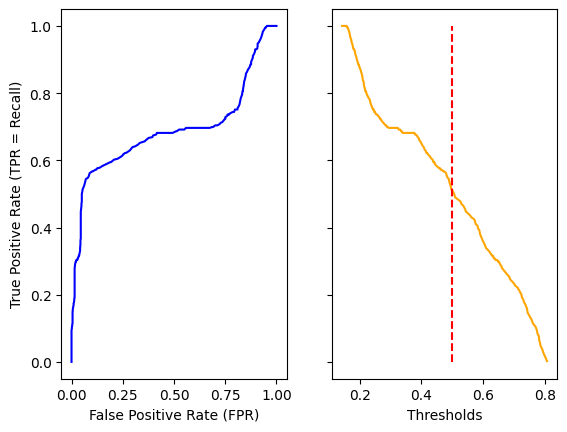

In [208]:
fig, (ax_roc, ax_thresh) = plt.subplots(ncols=2, nrows=1, sharey=True)
ax_roc.plot(fpr, tpr, color='b')
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR = Recall)')

ax_thresh.plot(thresholds, tpr, color='orange')
ax_thresh.vlines(0.5, ymax=1, ymin=0, color='r', linestyles='--')
ax_thresh.set_xlabel("Thresholds")

(0.0, 1.0)

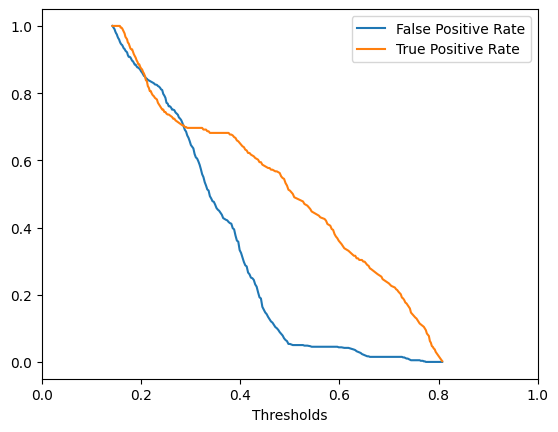

In [211]:
plt.plot(thresholds, fpr)
plt.plot(thresholds, tpr)
plt.xlabel("Thresholds")
plt.legend(['False Positive Rate', 'True Positive Rate'])
plt.xlim(0,1)  # roc_curve() sets high threshold at y_prob.max() + 1

Text(0, 0.5, 'True Positive Rate')

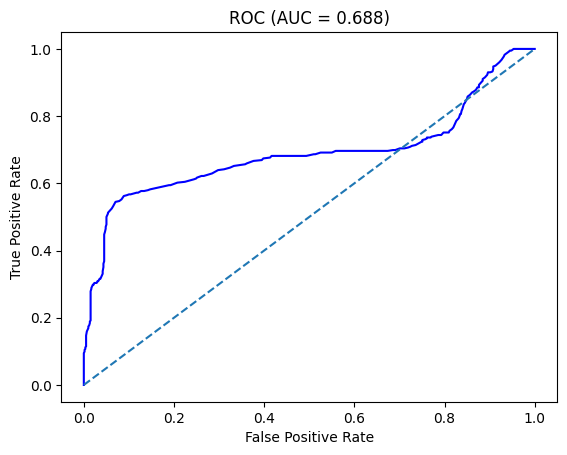

In [212]:
plt.plot(fpr, tpr, color='b')
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), linestyle="--")
plt.title(r"ROC (AUC = {:.3f})".format(clf_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

## Working Session until 2:15pm
- work on LogistcRegressionAssignment (in the assignments folder, move to Python Project)
- join your breakout rooms, will take a quick coffee break at 2:15pm and then takeup at 2:30pm

## Coffee break until 2:30pm
Answer key to assignment now on Github:
- https://github.com/TheMarqueeGroup/JPM_DS_Oct2023/blob/main/LogisticRegressionAssignmentAnswer.ipynb

# Decision Trees
- slide 75 in the presentation
- DecisionTree.ipynb file has more examples

In [220]:
from sklearn import tree #new code on top of the ones we used for Logistic Regression

In [223]:
df = pd.read_csv('ExData/score.csv')
df['Outcome'] = df['Scores'].apply(lambda x: 1 if x>50 else 0)
# df

In [224]:
X = df[['Hours']]
y = df['Outcome']
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X,y)

DecisionTreeClassifier(random_state=0)

In [226]:
df['Predict'] = clf.predict(X)

In [236]:
# clf.predict([[4.97]])

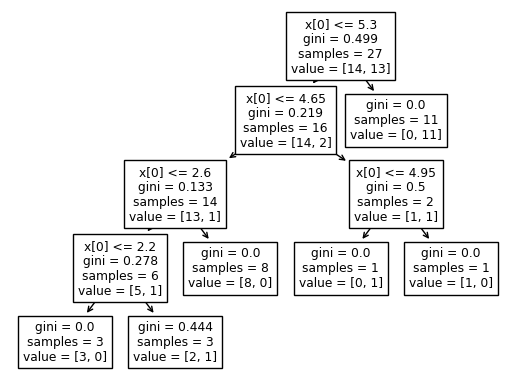

In [229]:
tree.plot_tree(clf)
plt.show()

In [230]:
df[df['Hours'].between(2.2, 2.6)]

,Hours,Scores,Outcome,Predict
0,2.5,21,0,0
16,2.5,30,0,0
25,2.5,75,1,0


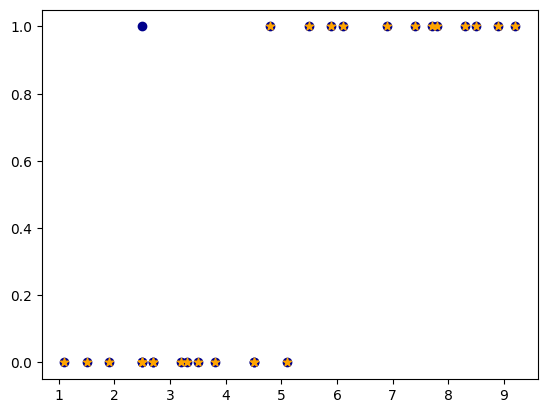

In [227]:
plt.scatter(df['Hours'], df['Outcome'], color='darkblue')
plt.scatter(df['Hours'], df['Predict'], color='orange', marker='*')

In [237]:
clf.score(X,y)

0.9629629629629629

In [239]:
print(classification_report(df['Outcome'], df['Predict']))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        13

    accuracy                           0.96        27
   macro avg       0.97      0.96      0.96        27
weighted avg       0.97      0.96      0.96        27



## Overfitting - Restraining the Levels (Depth of tree)

In [241]:
clf.get_depth() #counts how many splits happened, deepest level

4

In [242]:
clf.tree_.node_count

11

In [244]:
clf.get_n_leaves() #final or terminal leaves, where no more splits happen

6

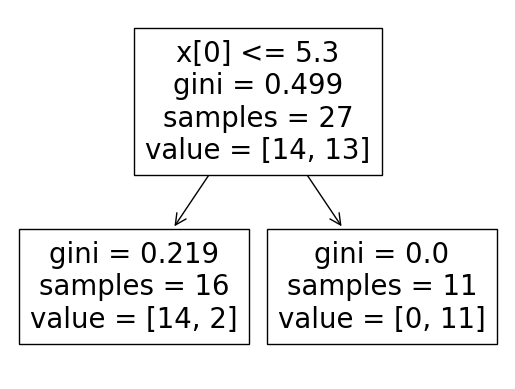

In [250]:
clf_restrained = tree.DecisionTreeClassifier(random_state=0, max_depth=1)
clf_restrained.fit(X, y)
tree.plot_tree(clf_restrained)
plt.show()

## Overfitting - Reducing Complexity with CCP Alpha
- slides 80 - 82

In [254]:
clf = tree.DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X, y) #slide 79
path

{'ccp_alphas': array([0.        , 0.00970018, 0.03042328, 0.3696845 ]),
 'impurities': array([0.04938272, 0.06878307, 0.12962963, 0.49931413])}

In [260]:
# path['ccp_alphas']

array([0.        , 0.00970018, 0.03042328, 0.3696845 ])

In [258]:
clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=0.03042328)
clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.03042328, random_state=0)

In [261]:
#tree.plot_tree(clf)

In [264]:
alphas = path['ccp_alphas']
models = []
for alpha in alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    clf.fit(X,y)
    models.append(clf)

In [267]:
model = models[0]

## Car Data Set - Decision Tree

In [271]:
df = pd.read_csv('ExData/car_data.csv', index_col=['User ID'])

In [272]:
X = df[['AnnualSalary']]
y = df['Purchased']
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X,y)

DecisionTreeClassifier(random_state=0)

In [277]:
clf.score(X,y)

0.82

In [278]:
print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       598
           1       0.84      0.68      0.75       402

    accuracy                           0.82      1000
   macro avg       0.82      0.80      0.81      1000
weighted avg       0.82      0.82      0.82      1000



In [276]:
# clf.get_depth() #18
clf.tree_.node_count #313

313

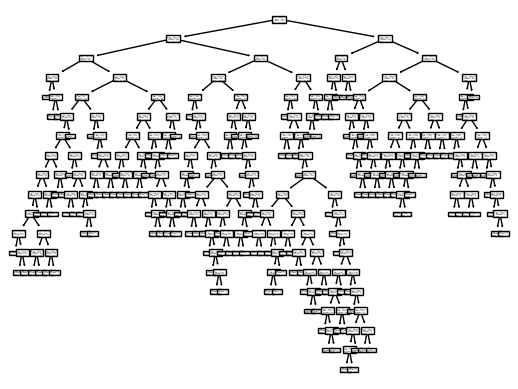

In [274]:
#Don't run this, might take a while
tree.plot_tree(clf)
plt.show()

## Working Session until 4:45pm
- work on the Decision Tree assignment

## Takeup Decision Tree Assignment
- solution on github:
    - https://github.com/TheMarqueeGroup/JPM_DS_Oct2023/blob/main/DecisionTreeAssignmentAnswer.ipynb
 
Takeup of Question 3 below

In [280]:
X = df[['Age','AnnualSalary']]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [283]:
path = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [285]:
len(ccp_alphas)

39

In [289]:
models = [] #store all the decision trees with diff alphas
train_scores = [] #accuracy scores of the training data
test_scores = [] #accuracy scores of test data
nodes = []
leaves = []
depths = []

for alpha in ccp_alphas:
    #print(alpha)
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    models.append(clf)

    #calc the scores
    score_train = clf.score(X_train, y_train)
    score_test = clf.score(X_test, y_test)

    #print(alpha, score_train, score_test)
    train_scores.append(score_train)
    test_scores.append(score_test)

    depths.append(clf.get_depth())
    nodes.append(clf.tree_.node_count)
    leaves.append(clf.get_n_leaves())

In [297]:
max(test_scores), test_scores.index(max(test_scores))

(0.912, 23)

In [299]:
best_clf = models[23]

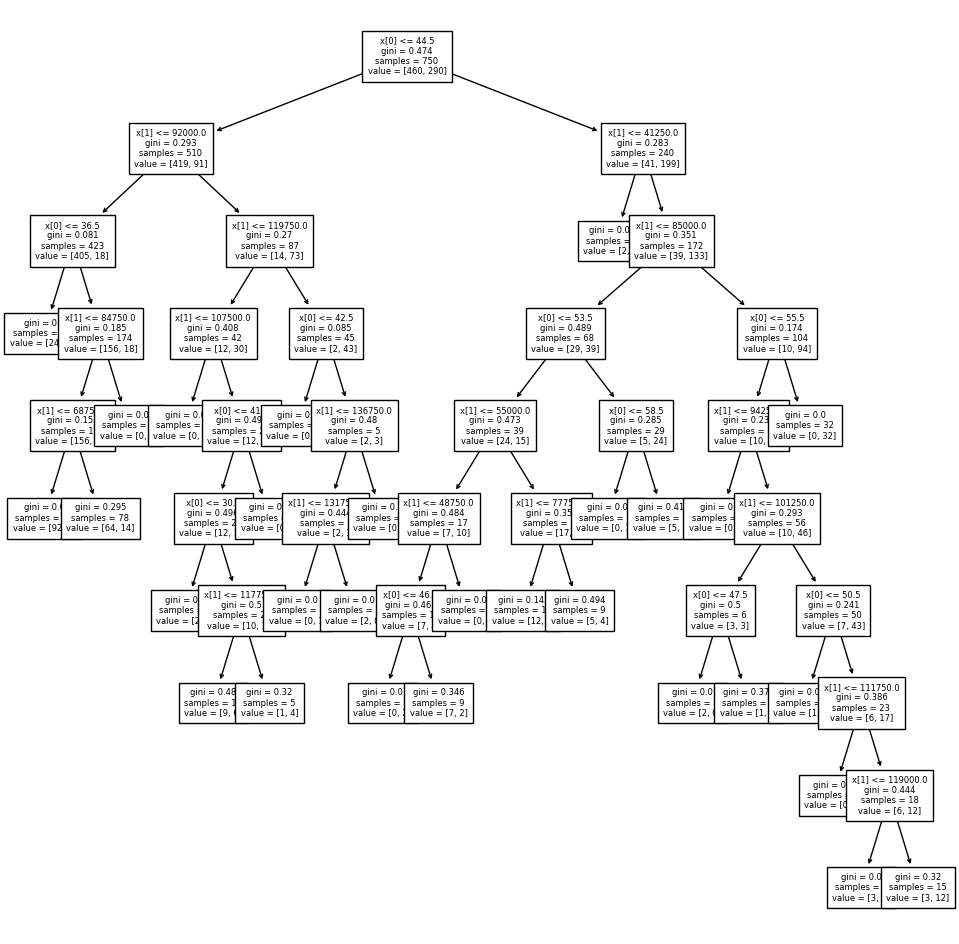

In [301]:
plt.figure(figsize=(12,12))
tree.plot_tree(best_clf, fontsize=6)
plt.show()

In [294]:
models_results = pd.DataFrame({'Alpha':ccp_alphas,
                               'Impurity':impurities,
                               'Train Score':train_scores,
                               'Test Score':test_scores,
                               'Depth':depths,
                               'Nodes':nodes,
                               'Leaves':leaves})
models_results                            

,Alpha,Impurity,Train Score,Test Score,Depth,Nodes,Leaves
0,0.000000,0.007111,0.993333,0.864,18,217,109
1,0.000222,0.007333,0.993333,0.864,18,215,108
2,0.000400,0.008133,0.993333,0.864,18,211,106
3,0.000444,0.008578,0.993333,0.864,18,207,104
4,0.000444,0.009022,0.993333,0.864,18,207,104
5,0.000711,0.016844,0.986667,0.864,14,185,93
6,0.000762,0.019130,0.985333,0.864,14,179,90
7,0.000800,0.019930,0.985333,0.864,14,177,89
8,0.000808,0.022354,0.982667,0.864,14,165,83
9,0.000808,0.024779,0.982667,0.864,14,165,83
